In [1]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm








beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


I=2.4
L = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 0.01 # <E> [eV] = kb*T
T_l =  0.001 # <E> [eV]
B = 0.060 # T for AD
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 182.43280000000 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T





beta_x=10 
beta_y=4
emittance=10*1e-6

arc=dtk.LinearTransferMatrix(Q_x=5.38518956965, Q_y=5.36921653748,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )

In [6]:
num_particles=1


dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=20*1e-3,
        py=0,
        delta=5e-4,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=1e-4)

       


num_turns=int(4*1e7)
step=100000

# initialize arrays
x = []
px = []
y = []
py = []
delta = []
action_x = []
action_y = []
force = []


max_amplitude_x = []
max_amplitude_y = []
max_delta = []

goal_action=1e-12

for i in tqdm(range(num_turns)):
    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        delta.append(dtk_particle.delta)
   
        # calculate action in horizontal plane
        action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
        
        max_amplitude_x.append(np.sqrt(2*(action_x_temp)*beta_x))
        # calculate action in vertical plane
        action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
        action_y.append(action_y_temp)
        
        max_amplitude_y.append(np.sqrt(2*(action_y_temp)*beta_y))

        max_delta.append((dtk_particle.delta))
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
y = np.array(y)
py = np.array(py)
delta=np.array(delta)
action_x = np.array(action_x)
action_y = np.array(action_y)
force = np.array(force)

max_amplitude_x=np.array(max_amplitude_x)
max_amplitude_y=np.array(max_amplitude_y)



time = np.arange(0, num_turns, step) * ms_per_turn



100%|██████████| 40000000/40000000 [49:17<00:00, 13525.79it/s]


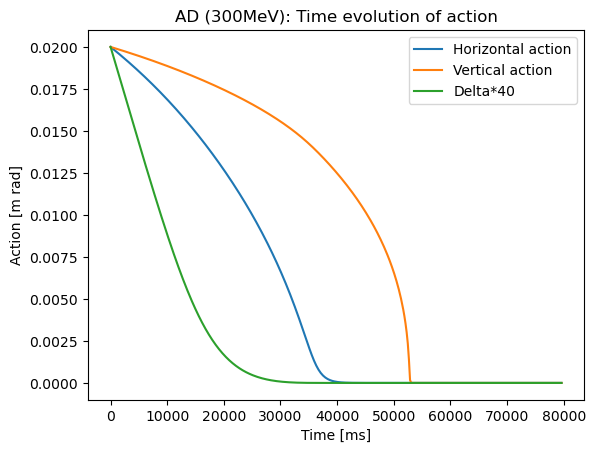

In [7]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,max_amplitude_x,label='Horizontal action')
plt.plot(time,max_amplitude_y,label='Vertical action')
plt.plot(time,delta*40,label='Delta*40')
plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)



In [5]:
#np.save("plot_data/6d_t.npy", time)

#np.save("plot_data/6d_x_b_ratio=0.npy", max_amplitude_x)
#np.save("plot_data/6d_y_b_ratio=0.npy", max_amplitude_y)

#np.save("plot_data/6d_x_b_ratio=1e-4.npy", max_amplitude_x)
#np.save("plot_data/6d_y_b_ratio=1e-4.npy", max_amplitude_y)

#np.save("plot_data/6d_x_b_ratio=5e-4.npy", max_amplitude_x)
#np.save("plot_data/6d_y_b_ratio=5e-4.npy", max_amplitude_y)


Minimum value in array: 0.0
Maximum value in array: 501944.76600256003


IndexError: list index out of range

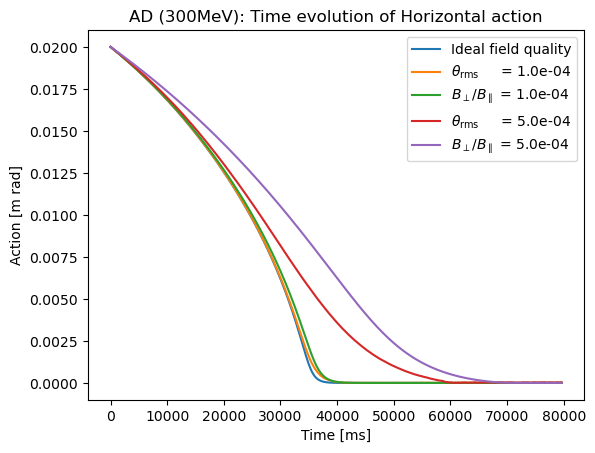

In [41]:
time=np.load('plot_data/6d_t.npy')

max_amplitude_x_6d_b_ratio_0=np.load('plot_data/6d_x_b_ratio=0.npy')
max_amplitude_y_6d_b_ratio_0=np.load('plot_data/6d_y_b_ratio=0.npy')

max_amplitude_x_6d_b_ratio_1=np.load('plot_data/6d_x_b_ratio=1e-4.npy')
max_amplitude_y_6d_b_ratio_1=np.load('plot_data/6d_y_b_ratio=1e-4.npy')

max_amplitude_x_6d_b_ratio_5=np.load('plot_data/6d_x_b_ratio=5e-4.npy')
max_amplitude_y_6d_b_ratio_5=np.load('plot_data/6d_y_b_ratio=5e-4.npy')

dubious_x1=np.load('plot_data/dubious_x_angle=1e-4.npy')
dubious_y1=np.load('plot_data/dubious_y_angle=1e-4.npy')

dubious_x5=np.load('plot_data/dubious_x_angle=5e-4.npy')
dubious_y5=np.load('plot_data/dubious_y_angle=5e-4.npy')

# plot the horizontal and vertical action vs time
plt.figure()

plt.plot(time,max_amplitude_x_6d_b_ratio_0,label="Ideal field quality")
#plt.plot(time,max_amplitude_y_6d_b_ratio_0,label='Vertical action (0)')

plt.plot(time,dubious_x1,label=r"$\theta_{\rm rms}$" + "     = {:.1e}".format(1e-4))


plt.plot(time,max_amplitude_x_6d_b_ratio_1,label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
#plt.plot(time,max_amplitude_y_6d_b_ratio_1,label='Vertical action (1e-4)')


#plt.plot(time,max_amplitude_y_6d_b_ratio_5,label='Vertical action (5e-4)')



plt.plot(time,dubious_x5,label=r"$\theta_{\rm rms}$" + "     = {:.1e}".format(5e-4))
plt.plot(time,max_amplitude_x_6d_b_ratio_5,label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(5e-4))

plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of Horizontal action')
plt.legend()
plt.ticklabel_format(useOffset=False)



Dubious different angle each turn



In [25]:
num_particles=1


dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=20*1e-3,
        py=0,
        delta=5e-4,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()




       


num_turns=int(4*1e7)
step=100000

# initialize arrays
x = []
px = []
y = []
py = []
delta = []
action_x = []
action_y = []
force = []


max_amplitude_x = []
max_amplitude_y = []
max_delta = []

goal_action=1e-12

for i in tqdm(range(num_turns)):
    angle=np.random.normal(0,5e-4,1)
    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=0,
                                         xp_cooler=angle)

    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        delta.append(dtk_particle.delta)



        # calculate action in horizontal plane
        action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
        
        max_amplitude_x.append(np.sqrt(2*(action_x_temp)*beta_x))
        # calculate action in vertical plane
        action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
        action_y.append(action_y_temp)
        
        max_amplitude_y.append(np.sqrt(2*(action_y_temp)*beta_y))

        max_delta.append((dtk_particle.delta))
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
y = np.array(y)
py = np.array(py)
delta=np.array(delta)
action_x = np.array(action_x)
action_y = np.array(action_y)
force = np.array(force)

max_amplitude_x=np.array(max_amplitude_x)
max_amplitude_y=np.array(max_amplitude_y)



time = np.arange(0, num_turns, step) * ms_per_turn


100%|██████████| 40000000/40000000 [1:43:08<00:00, 6463.64it/s]


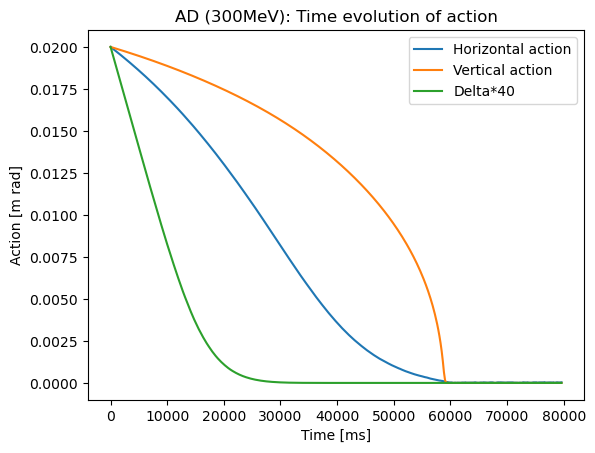

In [26]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,max_amplitude_x,label='Horizontal action')
plt.plot(time,max_amplitude_y,label='Vertical action')
plt.plot(time,delta*40,label='Delta*40')
plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)


In [27]:
np.save('plot_data/dubious_x_angle=5e-4.npy', max_amplitude_x)
np.save('plot_data/dubious_y_angle=5e-4.npy', max_amplitude_y)

Dubious version with interpolated function

In [5]:
px = np.load('plot_data/px.npy')
force_angle = np.load('plot_data/force_angle.npy')


from scipy.interpolate import interp1d

# sort px and force_angle arrays in ascending order
sort_idx = np.argsort(px)
px_sorted = px[sort_idx]
force_angle_sorted = force_angle[sort_idx]

# Create a function that interpolates the cooling force as a function of px
f = interp1d(px_sorted, -force_angle_sorted)



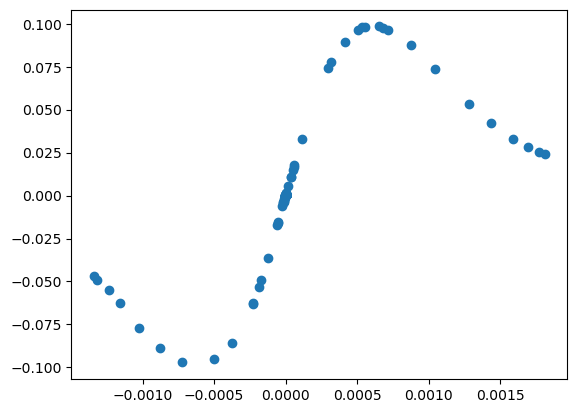

In [18]:
plt.figure()
plt.scatter(px,f(px))

In [10]:
num_particles=1


dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=20*1e-3,
        py=0,
        delta=0,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=0)

       


num_turns=int(4*1e7)
step=100000

# initialize arrays
x = []
px = []
y = []
py = []
delta = []
action_x = []
action_y = []
force = []


max_amplitude_x = []
max_amplitude_y = []
max_delta = []

goal_action=1e-12

for i in tqdm(range(num_turns)):
    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)

        #print('px',dtk_particle.px)


       

        delta.append(dtk_particle.delta)
   
        # calculate action in horizontal plane
        action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
        
        max_amplitude_x.append(np.sqrt(2*(action_x_temp)*beta_x))
        # calculate action in vertical plane
        action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
        action_y.append(action_y_temp)
        
        max_amplitude_y.append(np.sqrt(2*(action_y_temp)*beta_y))

        max_delta.append((dtk_particle.delta))
    
    Fx=f(dtk_particle.px)
    Fy=f(dtk_particle.py)
    Fl=f(dtk_particle.delta)
    arc.track(dtk_particle)
    dtk_cooler.track2(dtk_particle,Fx,Fy,Fl)
       
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
y = np.array(y)
py = np.array(py)
delta=np.array(delta)
action_x = np.array(action_x)
action_y = np.array(action_y)
force = np.array(force)

max_amplitude_x=np.array(max_amplitude_x)
max_amplitude_y=np.array(max_amplitude_y)



time = np.arange(0, num_turns, step) * ms_per_turn


100%|██████████| 40000000/40000000 [1:39:37<00:00, 6692.30it/s]


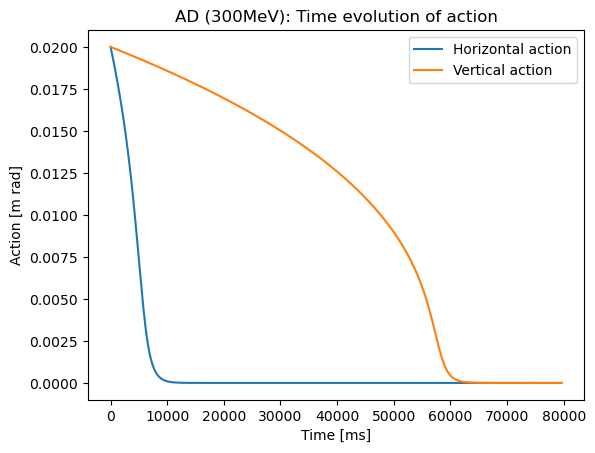

In [17]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,max_amplitude_x,label='Horizontal action')
plt.plot(time,max_amplitude_y,label='Vertical action')
#plt.plot(time,delta*40,label='Delta*40')
plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)



In [12]:
#np.save('plot_data/dubious_x.npy', max_amplitude_x)
#np.save('plot_data/dubious_y.npy', max_amplitude_y)